In [12]:
import math
import numpy as np
import pandas as pd
import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt
import yfinance as yf

In [13]:
def get_returns(stocks, start, end):
    data = yf.download(stocks, start=start, end=end)
    close_data = data['Adj Close']
    returns = close_data.pct_change()
    mean_returns = returns.mean()
    cov_matrix = returns.cov()
    return mean_returns, cov_matrix

In [55]:
stockList = ['NVDA', 'SMCI', 'TSLA', 'MU', 'AAPL', 'AMD']
endDate = datetime.datetime.now()
startDate = endDate - datetime.timedelta(days=300)
mean_returns, cov_matrix = get_returns(stockList, startDate, endDate)
weights = np.random.random(len(mean_returns))
weights /= np.sum(weights)

[*********************100%%**********************]  6 of 6 completed


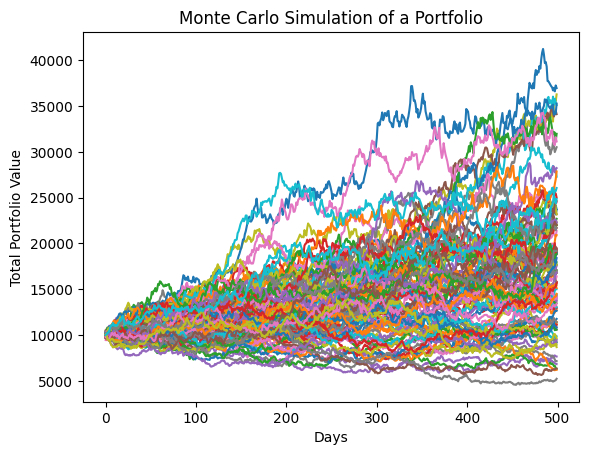

In [61]:
num_sims = 100
T = 500
meanM = np.full(shape=(T, len(weights)), fill_value=mean_returns).T

portfolio_sims = np.full(shape=(T, num_sims), fill_value=0.0)
initial_portfolio = 10000

for m in range(num_sims):
    Z = np.random.normal(size=(T, len(weights)))
    L = np.linalg.cholesky(cov_matrix)
    daily_returns = meanM + np.inner(L, Z)
    portfolio_sims[:, m] = np.cumprod(np.inner(weights, daily_returns.T)+1) * initial_portfolio

plt.plot(portfolio_sims)
plt.xlabel('Days')
plt.ylabel('Total Portfolio Value')
plt.title('Monte Carlo Simulation of a Portfolio')
plt.show()

In [120]:
S = 881.86
K = 870
vol = 0.5513
r = 0.01
N = 10
M = 10000
market_value = 90.23

T = ((datetime.date(2024, 6, 21) - datetime.date.today()).days + 1) / 365 

In [123]:
dt = T/N
nudt = (r - 0.5 * vol ** 2) * dt
volsdt = vol * np.sqrt(dt)
lnS = np.log(S)

sum_CT = 0
sum_CT2 = 0

for i in range(M):
    lnSt = lnS
    for j in range(N):
        lnSt += nudt + volsdt * np.random.normal()

    ST = np.exp(lnSt)
    CT = max(0, ST - K)
    sum_CT += CT
    sum_CT2 += CT ** 2

C0 = np.exp(-r * T) * sum_CT / M
sigma = np.sqrt((sum_CT2 - sum_CT * sum_CT / M) * np.exp(-2 * r * T) / (M - 1))

SE = sigma / np.sqrt(M)

print("Call value of ${0} with standard error +/- {1}".format(round(C0, 2), round(SE, 2)))

Call value of $89.03 with standard error +/- 1.46


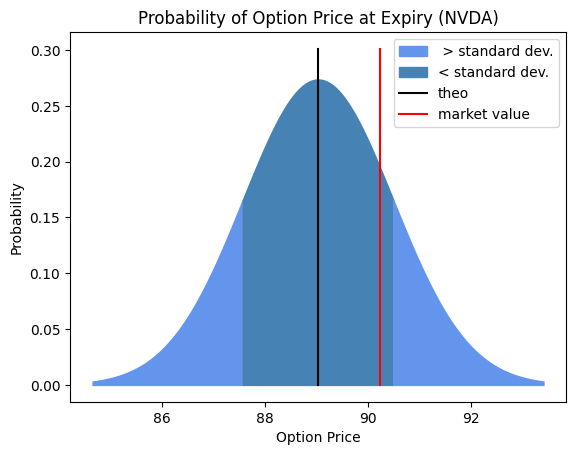

In [124]:
min_sd = np.linspace(C0 - 3 * SE, C0 - SE, 100)
sd = np.linspace(C0 - SE, C0 + SE, 100)
plus_sd = np.linspace(C0 + SE, C0 + 3 * SE, 100)

s1 = stats.norm.pdf(min_sd, C0, SE)
s2 = stats.norm.pdf(sd, C0, SE)
s3 = stats.norm.pdf(plus_sd, C0, SE)

plt.fill_between(min_sd, s1, color='cornflowerblue', label=' > standard dev.')
plt.fill_between(sd, s2, color='steelblue', label = '< standard dev.')
plt.fill_between(plus_sd, s3, color='cornflowerblue')

plt.plot([C0, C0], [0, max(s2) * 1.1], 'k', label='theo')
plt.plot([market_value, market_value], [0, max(s2) * 1.1], 'r', label='market value')

plt.xlabel('Option Price')
plt.ylabel('Probability')
plt.title('Probability of Option Price at Expiry (NVDA)')
plt.legend()
plt.show()